In [53]:



import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

start_time = time.time()

##for k in range(5):


flag = -1
k =0 
ypos0 = list(range(0,10)) ## for point 0 
ypos1 = list(range(0,10)) ## for point 1


BEGIN
STAGE 1
READ IMAGE
SEND INPUT
(1, 44, 46, 46)
k 1
BEGIN
STAGE 1
READ IMAGE
SEND INPUT
(1, 44, 46, 46)
Frame 1
H2 31.304347826086957
h 0.0
_______________________________________________________________
!!!!!!!!!SOMEONE FELL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_______________________________________________________________
k 2
BEGIN
STAGE 1
READ IMAGE
SEND INPUT
(1, 44, 46, 46)
Frame 2
H2 26.08695652173913
h 31.304347826086957
k 3
BEGIN
STAGE 1
READ IMAGE
SEND INPUT
(1, 44, 46, 46)
Frame 3
H2 26.08695652173914
h 26.08695652173913
k 4
BEGIN
STAGE 1
READ IMAGE
SEND INPUT


KeyboardInterrupt: 

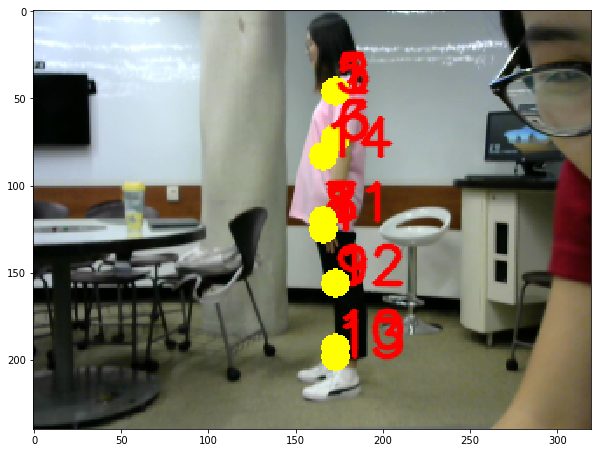

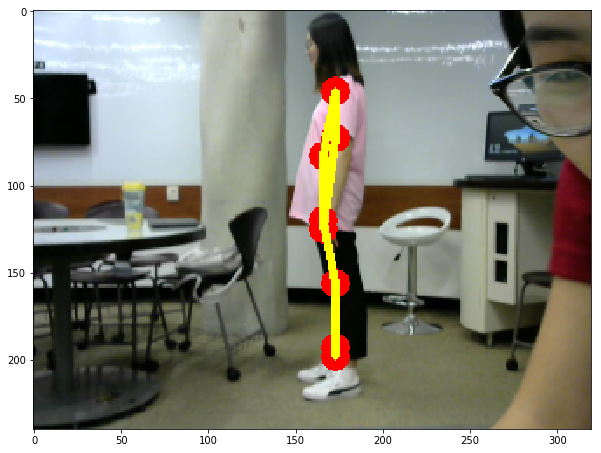

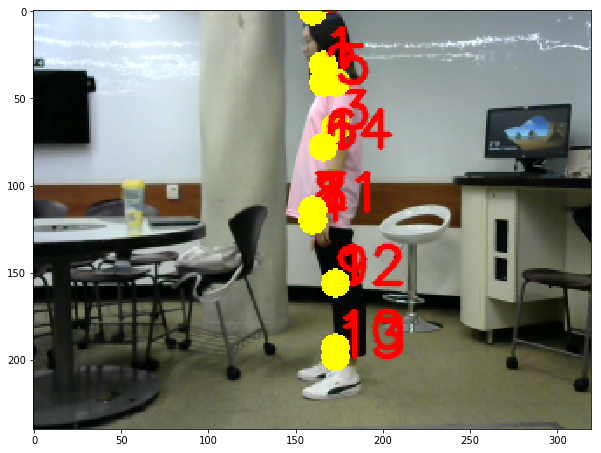

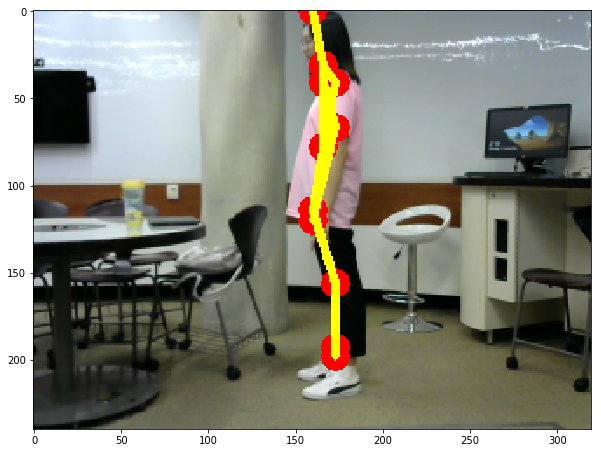

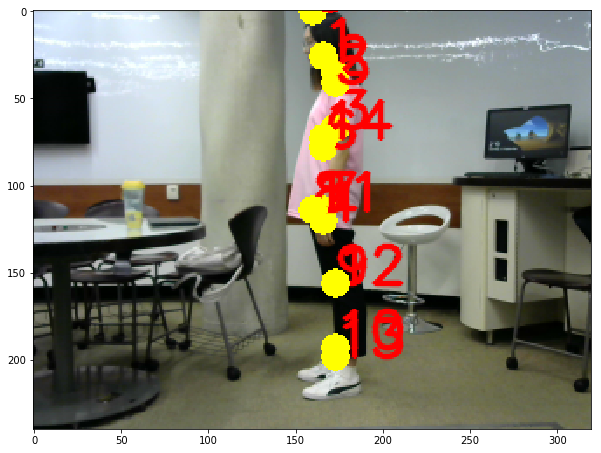

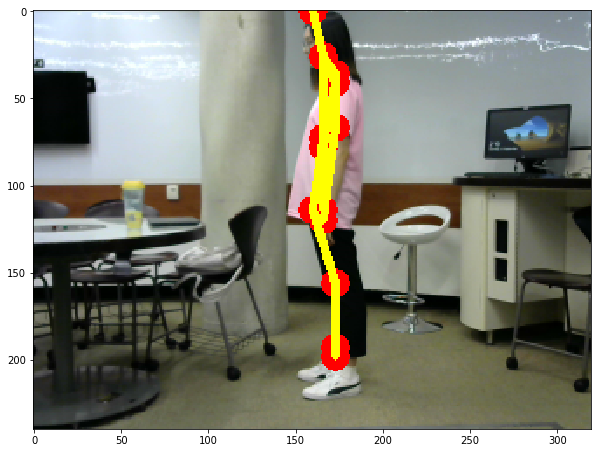

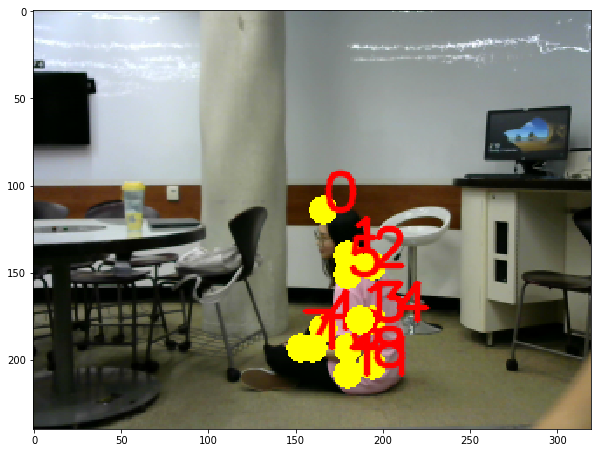

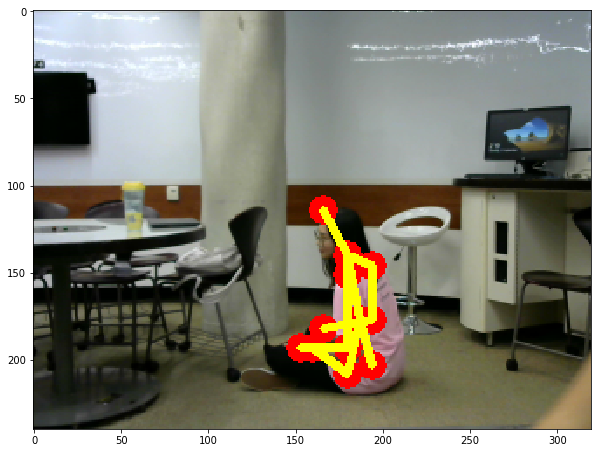

In [54]:

while True:
    cap = cv2.VideoCapture(1)
    if not cap.isOpened():
        raise IOError("Cannot open webcam")

    while True:
        ret, frame = cap.read()
        frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
        cv2.imshow('Input', frame)

        ##c = cv2.waitKey(1)
        ##if c == 27: 
            ##break
        if time.time() - start_time >= 0.1:#<---- Check if 0.1 sec passed
            break
            
    print("BEGIN")
    cap.release()
    cv2.destroyAllWindows()
    cv2.imwrite('/Users/user/Desktop/Xilinx/test{}.png'.format(k),frame)
    
    start_time = time.time()    
# Check if the webcam is opened correctly



    MODE = "MPI"
    print("STAGE 1")
 
    if MODE is "COCO":
        protoFile = "pose/coco/pose_deploy_linevec.prototxt"
        weightsFile = "pose/coco/pose_iter_440000.caffemodel"
        nPoints = 18
        POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

    elif MODE is "MPI" :
        protoFile = "pose_deploy_linevec_faster_4_stages.prototxt.txt"
        weightsFile = "pose_iter_160000.caffemodel"
        nPoints = 15
        POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]


    print("READ IMAGE")

    image1 = cv2.imread("test{}.png".format(k))
    frameWidth = image1.shape[1]
    frameHeight = image1.shape[0]
    threshold = 0.1
    net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)


    inWidth = 368
    inHeight = 368
    inpBlob = cv2.dnn.blobFromImage(image1, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

    print("SEND INPUT")

    net.setInput(inpBlob)
    output = net.forward()
    H = output.shape[2]
    W = output.shape[3]
    print(output.shape)


    frame = cv2.imread("test{}.png".format(k))
    frameCopy = np.copy(frame)
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    threshold = 0.1
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                              (0, 0, 0), swapRB=False, crop=False)

    net.setInput(inpBlob)

    output = net.forward()
    H = output.shape[2]
    W = output.shape[3]
    # Empty list to store the detected keypoints
    points = []

    for i in range(nPoints):
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]

        # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

        # Scale the point to fit on the original image
        x = (frameWidth * point[0]) / W
        y = (frameHeight * point[1]) / H


        #####################################ALGORITHM TO SEE IF SOMEONE FALLS########################
        
        if(i==0 and k==0):  ##first frame and point 0 is initialized
            ypos0[k] = y;  
        elif(i==1 and k==0):
            ypos1[k] = y;
        
        if(i==0 and k>0): ##other frames and point 0 
            ypos0[k] = y;
        elif(i==1 and k>0):
            ypos1[k] = y;
        
        if(k>0 and (i==1)): #after first frame, compare after point 0 and 1 gets measurements
            h = ypos1[k-1] - ypos0[k-1] 
            h2 = ypos1[k] - ypos0[k]   
            
            
            print("Frame", k )
            
            
            print("H2", h2)
            print("h", h)
            if((h/h2) <= 0.5):
                print("_______________________________________________________________")
                print("!!!!!!!!!SOMEONE FELL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                print("_______________________________________________________________")

            
        
        
        
        
        """
        if (i == 0 and k>=1): ##first frame for Point 0
            ypos = y
            yfinalpos = 0
            print(ypos)
            
        else:
            count = 1
            yfinalpos = y
        
        finalp = yfinalpos - ypos
        if(finalp > 150):
                print("A PERSON FELL")

        else:
            print("SAFE")"""

        if prob > threshold : 
            cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
            cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

            # Add the point to the list if the probability is greater than the threshold
            points.append((int(x), int(y)))
        else :
            points.append(None)

    # Draw Skeleton
    for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]

        if points[partA] and points[partB]:
            cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3)

    plt.figure(figsize=[10,10])
    plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
    plt.figure(figsize=[10,10])
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    k = k + 1
    print("k", k)